# How does the month in which a song was released affect its Spotify streams?

In [39]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('B:\R\R Directories\Portfolio\Datasets\Spotify_Data\Spotify_Data.csv')

# Cleaning the data
df['release_date'] = pd.to_datetime(df['Release Date']) # Convert 'Release Date' to datetime, change column name
df = df.drop('Release Date', axis=1) # Drop the old 'Release Date' column for tidiness
df['explicit_track'] = df['Explicit Track'].astype('category') # Convert 'Explicit Track' to bool and change name

# Function to remove commas and convert to int - fix this by working out which values dont work
def safe_to_int(value):
    try:
        return int(value.replace(',', ''))
    except AttributeError:
        return None

columns_to_convert = df[['Spotify Streams', 'YouTube Views', 'Spotify Playlist Count',
                         'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
                         'Soundcloud Streams']]
for col in columns_to_convert:
    df[col] = df[col].apply(safe_to_int)

In [25]:
# Variables for defining colours
background_color = '#101010'
button_gray = '#B3B3B3'
spotify_green = '#1DB954'

In [37]:
# Convert release date to release month
df['release_month'] = df['release_date'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['release_month'] = pd.Categorical(df['release_month'], categories=month_order, ordered=True)

In [27]:
# Remove outliers using standard function
Q1 = df['Spotify Streams'].quantile(0.25)
Q3 = df['Spotify Streams'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['Spotify Streams'] >= (Q1 - 1.5 * IQR)) & 
                 (df['Spotify Streams'] <= (Q3 + 1.5 * IQR))]

In [28]:
# Calculate the average streams for each month
monthly_avg = df_filtered.groupby('release_month')['Spotify Streams'].median().reset_index()

C:\Users\archi\AppData\Local\Temp\ipykernel_12300\1582044644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df_filtered.groupby('release_month')['Spotify Streams'].median().reset_index()


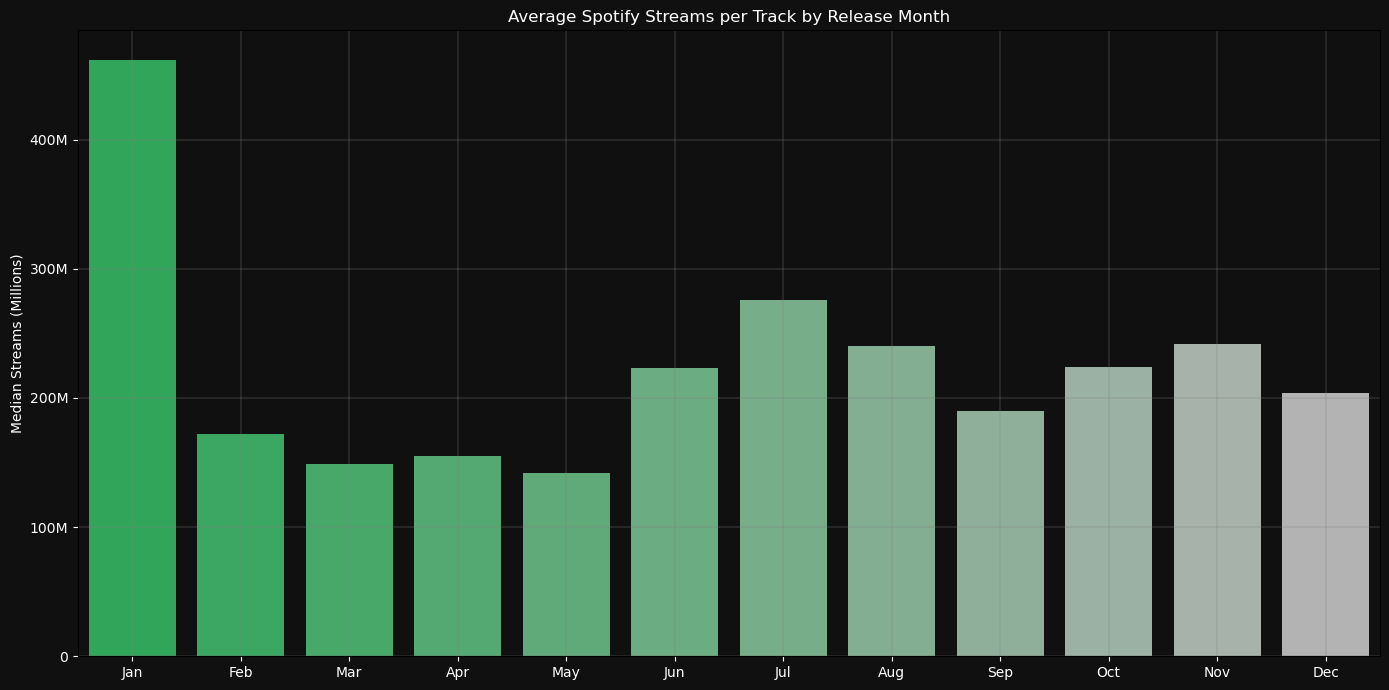

In [45]:
# Try plotting as bar charts
plt.figure(figsize=(14, 7))
sns.barplot(x='release_month', y='Spotify Streams', data=monthly_avg, 
            hue='release_month', palette="blend:#1DB954,#B3B3B3", legend=False)

# convert x axis to show months by name, convert y axis to show numerical values for median streams
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: '0' if y == 0 else f'{int(y / 1_000_000)}M'))

# Set colour scheme
fig = plt.gcf() # Get current figure
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='both', colors='w')  # Change color of numbers on axes

# Customising labels, title, grid, etc
ax.grid(color='gray', linewidth=0.3)
plt.xlabel('')
plt.ylabel('Median Streams (Millions)', c='w')
plt.title('Average Spotify Streams per Track by Release Month', c='w')
plt.tight_layout()
plt.show()